In [6]:
from textblob import TextBlob
import snscrape.modules.twitter as sntwitter
import nltk
import pandas as pd
import re
import string
import numpy as np


#import NLP packages
from nltk.corpus import stopwords, words        # get stopwords from NLTK library & get all words in english language
from nltk.tokenize import word_tokenize         # to create word tokens
from nltk.stem import WordNetLemmatizer         # to reduce words to orginal form
from nltk import pos_tag                        # For Parts of Speech tagging


import plotly.express as px                     # To make express plots in Plotly
import plotly.io as pio                         # Plotly renderer
import plotly.graph_objects as go               # For plotting plotly graph objects
from plotly.subplots import make_subplots       #to make more than one plot in Plotly
import matplotlib.pyplot as plt

In [7]:
query = "National Cathedral since:2018-01-01 until:2022-07-06"

tweets =[]
limit = 50000

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
        if len(tweets) == limit:
            break  
        else:
            tweets.append([tweet.id, tweet.user.username, tweet.date, tweet.content, tweet.user.location])
  

In [8]:
# Put the extracted tweets into a DataFrame
Data = pd.DataFrame(tweets, columns=["tweet_id", "user", "date", "tweet", "location"])
Data

,tweet_id,user,date,tweet,location
0,1539033651438137344,JustMeG__,2022-06-20 23:53:11+00:00,@Ghfirst1 @AnnanPerry Then he should talk abou...,
1,1539030806789767168,GeniLeeDC,2022-06-20 23:41:52+00:00,I visited the Washington National Cathedral to...,20001
2,1539026453643378692,JohnAnnanU,2022-06-20 23:24:34+00:00,So you seek contributions from the public to b...,🇺🇸 ATL
3,1539025425887858688,kyfillagh,2022-06-20 23:20:29+00:00,National Cathedral registered as private entit...,"Sekondi Takoradi, Ghana"
4,1539024436979982340,AsareTheophil16,2022-06-20 23:16:34+00:00,@Ebenezer_Carson National cathedral,"Accra, Ghana"
...,...,...,...,...,...
49995,1108800235306913793,JamesGleick,2019-03-21 18:39:11+00:00,"Come on, who are you going to believe? Donald ...",New York City
49996,1108800192827002881,progressivepush,2019-03-21 18:39:01+00:00,National Cathedral says Trump didn't need to g...,USA
49997,1108800153555632128,BMbsf,2019-03-21 18:38:51+00:00,Good for the National Cathedral! #ProudEpiscop...,
49998,1108799184596029441,lwalshmill,2019-03-21 18:35:00+00:00,@Acosta It's so SAD that the National Cathedra...,NJ


In [9]:
Data["tweet"]

0        @Ghfirst1 @AnnanPerry Then he should talk abou...
1        I visited the Washington National Cathedral to...
2        So you seek contributions from the public to b...
3        National Cathedral registered as private entit...
4                      @Ebenezer_Carson National cathedral
                               ...                        
49995    Come on, who are you going to believe? Donald ...
49996    National Cathedral says Trump didn't need to g...
49997    Good for the National Cathedral! #ProudEpiscop...
49998    @Acosta It's so SAD that the National Cathedra...
49999    @PressSec Kind of like how the NATIONAL CATHED...
Name: tweet, Length: 50000, dtype: object

In [10]:
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'$', '', text)
    text = re.sub(r'_', '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    myre = re.compile(u'[u"\U0001F600-\U0001F64F", u"\U0001F300-\U0001F5FF"]+',re.UNICODE)
    myre.sub('', text)
    
    return text

In [11]:
Data['tweet'] = Data['tweet'].apply(cleanText)

In [12]:
Data['tweet'].head(50)

0       Then he should talk about Otabil on banking ...
1     I visited the Washington National Cathedral to...
2     So you seek contributions from the public to b...
3     National Cathedral registered as private entit...
4                             Carson National cathedral
5      The name "National Cathedral" brings absolute...
6      If the president wants to build the National ...
7     Sonnie Badu was paid $50,000 to sing at the la...
8     National Cathedral: Sole sourcing contract to ...
9     National Cathedral is privately registered; Du...
10    National Cathedral is privately registered; Du...
11    National Cathedral registered as private entit...
12    Perfect summer day at National Cathedral in Wa...
13    The national cathedral should be funded the ch...
14    Azure Is it true that, the national cathedral ...
15    ghana If you ask this Gentleman of Jesus to us...
16    GHC25m spent on National Cathedral by govt ins...
17    GHC25m spent on National Cathedral by govt

In [13]:
#we want to remove emojis from our tweets
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [14]:
#Apply the above function to remove emojis from all tweets
Data['tweet'] = Data['tweet'].apply(remove_emoji)

In [15]:
#We take a look at the top 10 tweets to verify our function
Data['tweet'].head(10)

0      Then he should talk about Otabil on banking ...
1    I visited the Washington National Cathedral to...
2    So you seek contributions from the public to b...
3    National Cathedral registered as private entit...
4                            Carson National cathedral
5     The name "National Cathedral" brings absolute...
6     If the president wants to build the National ...
7    Sonnie Badu was paid $50,000 to sing at the la...
8    National Cathedral: Sole sourcing contract to ...
9    National Cathedral is privately registered; Du...
Name: tweet, dtype: object

In [16]:
# Check for duplicate tweets.
Data.duplicated(subset='tweet_id').sum()

0

In [17]:
# Check for all missing values.
Data.isna().any()

tweet_id    False
user        False
date        False
tweet       False
location    False
dtype: bool

In [18]:
# We can see that our location column has empty rows.
Data['location'].head(10)

0                           
1                      20001
2                     🇺🇸 ATL
3    Sekondi Takoradi, Ghana
4               Accra, Ghana
5                           
6                           
7                      Ghana
8                           
9                           
Name: location, dtype: object

In [19]:
# Replace empty rows in the location columns with NaN
Data['location'] = Data['location'].replace(r'^\s*$', np.nan, regex=True)

# Replace NaN values with 'No location'
Data['location']=Data['location'].fillna('No location')

In [20]:
Data['location'].head(10)

0                No location
1                      20001
2                     🇺🇸 ATL
3    Sekondi Takoradi, Ghana
4               Accra, Ghana
5                No location
6                No location
7                      Ghana
8                No location
9                No location
Name: location, dtype: object

In [21]:
def cleantweets(tweet):
        tweet = tweet.lower()  
    
        # Remove stopwords 
        tweet_tokens = word_tokenize(tweet)                                 # convert string to tokens
        filtered_words = [w for w in tweet_tokens if w not in stop_words]
        filtered_words = [w for w in filtered_words if w in word_list]

        # Remove punctuations
        unpunctuated_words = [char for char in filtered_words if char not in string.punctuation]
        unpunctuated_words = ' '.join(unpunctuated_words)
     

        return "".join(unpunctuated_words)                                  # join words with a space in between them
    
    
def getAdjectives(tweet):
        tweet = word_tokenize(tweet)                                        # convert string to tokens
        tweet = [word for (word, tag) in pos_tag(tweet) if tag == "JJ"]     # pos_tag module in NLTK library
        return " ".join(tweet)                                              # join words with a space in between them


In [22]:
# Defining my NLTK stop words and my user-defined stop words
stop_words = list(stopwords.words('english'))

user_stop_words = ['ng','gh','GHC', 'million', 'RF','National', 'Cathedral', 'Secretariat', 'national', 'cathedral']

alphabets = list(string.ascii_lowercase)

stop_words = stop_words + user_stop_words + alphabets

word_list = words.words()                                                    # all words in English language

In [23]:
#We want to check the outcome of our cleantweets function
print(cleantweets("The National Cathedral is shameful and a waste of ghanaian taxes"))

shameful waste


In [24]:
#We want to check the outcome of our getAdjectives function
print(getAdjectives("The National Cathedral is shameful and disrepectful and a waste of ghanaian taxes"))

shameful disrepectful ghanaian


In [25]:
# We create two new columns for our cleaned tweets and also get the adjectives in those tweets
Data['cleaned_tweet'] = Data['tweet'].apply(cleantweets)
Data['tweet_adjectives'] = Data['cleaned_tweet'].apply(getAdjectives)

In [26]:
# Take a look at our data
Data.head()

,tweet_id,user,date,tweet,location,cleaned_tweet,tweet_adjectives
0,1539033651438137344,JustMeG__,2022-06-20 23:53:11+00:00,Then he should talk about Otabil on banking ...,No location,talk banking saga,
1,1539030806789767168,GeniLeeDC,2022-06-20 23:41:52+00:00,I visited the Washington National Cathedral to...,20001,today image mother child main entrance image,main
2,1539026453643378692,JohnAnnanU,2022-06-20 23:24:34+00:00,So you seek contributions from the public to b...,🇺🇸 ATL,seek public build actually private entity get ...,seek public private fund private undertaking p...
3,1539025425887858688,kyfillagh,2022-06-20 23:20:29+00:00,National Cathedral registered as private entit...,"Sekondi Takoradi, Ghana",registered private entity,registered private
4,1539024436979982340,AsareTheophil16,2022-06-20 23:16:34+00:00,Carson National cathedral,"Accra, Ghana",,


In [67]:
# We want to determine Word frequency
from collections import Counter
counts = Counter(Data['tweet_adjectives'])
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.columns = ['Words', 'Count']
df.sort_values(by='Count', ascending=False, inplace=True)

In [68]:
tweets_wordcloud = ''.join([twts for twts in Data['cleaned_tweet']])

In [69]:
from PIL import Image
from wordcloud import WordCloud
import random

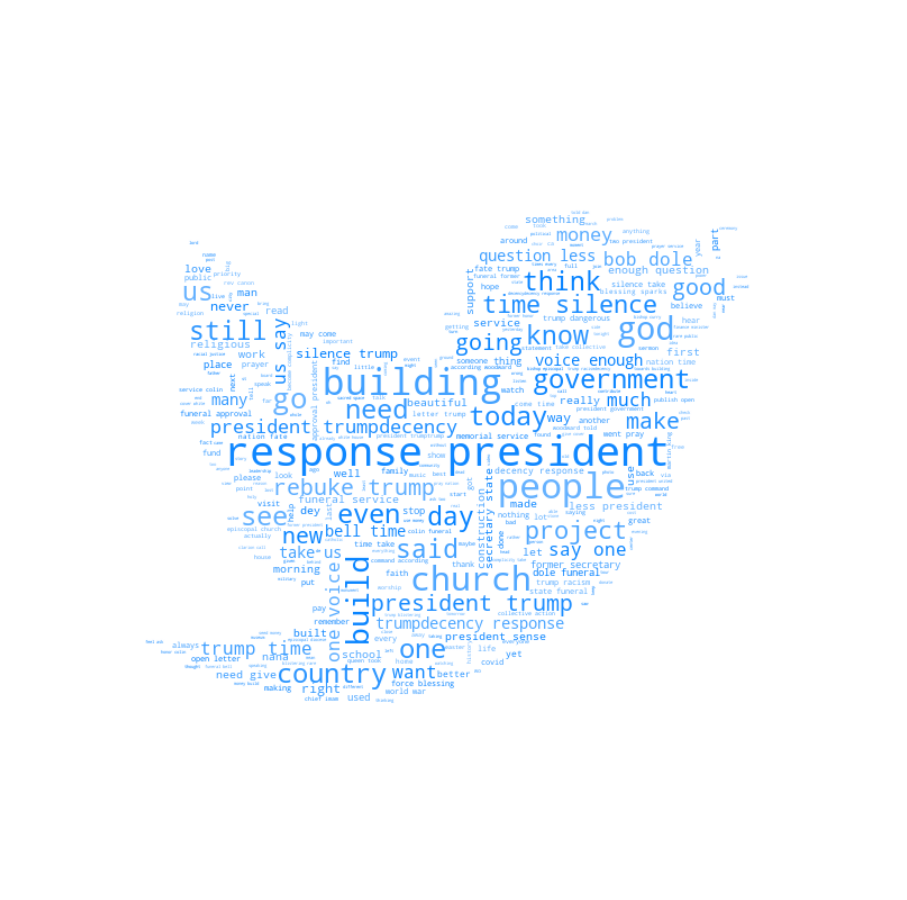

In [70]:
#import image into the notebook
image = np.array(Image.open('twitter_image.png')) 

def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)

# Instantiate the Twitter word cloud object
twitter_wc = WordCloud(background_color='white', max_words=1500, mask=image)

# generate the word cloud
twitter_wc.generate(tweets_wordcloud )

# display the word cloud
fig = plt.figure()
fig.set_figwidth(16)  # set width
fig.set_figheight(20)  # set height

plt.imshow(twitter_wc.recolor(color_func=blue_color_func, random_state=3),interpolation="bilinear")
plt.axis('off')
plt.show()

In [71]:
df_sorted = df.head(6)
df_sorted.drop
df_sorted

,Words,Count
0,,19310
1475,funeral,952
9454,rebuke,363
38,new,342
1035,enough,319
4308,trump,258
1824,chief,256
8795,give funeral,206
382,good,173
964,live,170


In [72]:
fig = px.bar(df_sorted, x = "Words", y = "Count", color = "Count", height=400)
fig.show()

In [37]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create two new columns for both Subjectivity and Polarity
Data['Subjectivity'] = Data['cleaned_tweet'].apply(getSubjectivity)
Data['Polarity'] = Data['cleaned_tweet'].apply(getPolarity)

#Show the new DataFrame
Data.head()

,tweet_id,user,date,tweet,location,cleaned_tweet,tweet_adjectives,Subjectivity,Polarity
0,1539033651438137344,JustMeG__,2022-06-20 23:53:11+00:00,Then he should talk about Otabil on banking ...,No location,talk banking saga,,0.000000,0.000000
1,1539030806789767168,GeniLeeDC,2022-06-20 23:41:52+00:00,I visited the Washington National Cathedral to...,20001,today image mother child main entrance image,main,0.333333,0.166667
2,1539026453643378692,JohnAnnanU,2022-06-20 23:24:34+00:00,So you seek contributions from the public to b...,🇺🇸 ATL,seek public build actually private entity get ...,seek public private fund private undertaking p...,0.379167,-0.125000
3,1539025425887858688,kyfillagh,2022-06-20 23:20:29+00:00,National Cathedral registered as private entit...,"Sekondi Takoradi, Ghana",registered private entity,registered private,0.375000,0.000000
4,1539024436979982340,AsareTheophil16,2022-06-20 23:16:34+00:00,Carson National cathedral,"Accra, Ghana",,,0.000000,0.000000


In [38]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

Data['Analysis']=Data['Polarity'].apply(getAnalysis)

#Show the new DataFrame
Data.head()

,tweet_id,user,date,tweet,location,cleaned_tweet,tweet_adjectives,Subjectivity,Polarity,Analysis
0,1539033651438137344,JustMeG__,2022-06-20 23:53:11+00:00,Then he should talk about Otabil on banking ...,No location,talk banking saga,,0.000000,0.000000,Neutral
1,1539030806789767168,GeniLeeDC,2022-06-20 23:41:52+00:00,I visited the Washington National Cathedral to...,20001,today image mother child main entrance image,main,0.333333,0.166667,Positive
2,1539026453643378692,JohnAnnanU,2022-06-20 23:24:34+00:00,So you seek contributions from the public to b...,🇺🇸 ATL,seek public build actually private entity get ...,seek public private fund private undertaking p...,0.379167,-0.125000,Negative
3,1539025425887858688,kyfillagh,2022-06-20 23:20:29+00:00,National Cathedral registered as private entit...,"Sekondi Takoradi, Ghana",registered private entity,registered private,0.375000,0.000000,Neutral
4,1539024436979982340,AsareTheophil16,2022-06-20 23:16:34+00:00,Carson National cathedral,"Accra, Ghana",,,0.000000,0.000000,Neutral


In [40]:
Data['Analysis'].value_counts()

Neutral     28409
Positive    14428
Negative     7163
Name: Analysis, dtype: int64

In [58]:
Counts = Data['Analysis'].value_counts().rename_axis('Sentiments').to_frame('Total Occurrence').reset_index()
fig = px.bar(Counts, x = "Sentiments", y = 'Total Occurrence', color = 'Total Occurrence', height=400)
fig.show()
Counts

,Sentiments,Total Occurrence
0,Neutral,28409
1,Positive,14428
2,Negative,7163


In [59]:
Data.head(10)

,tweet_id,user,date,tweet,location,cleaned_tweet,tweet_adjectives,Subjectivity,Polarity,Analysis
0,1539033651438137344,JustMeG__,2022-06-20 23:53:11+00:00,Then he should talk about Otabil on banking ...,No location,talk banking saga,,0.000000,0.000000,Neutral
1,1539030806789767168,GeniLeeDC,2022-06-20 23:41:52+00:00,I visited the Washington National Cathedral to...,20001,today image mother child main entrance image,main,0.333333,0.166667,Positive
2,1539026453643378692,JohnAnnanU,2022-06-20 23:24:34+00:00,So you seek contributions from the public to b...,🇺🇸 ATL,seek public build actually private entity get ...,seek public private fund private undertaking p...,0.379167,-0.125000,Negative
3,1539025425887858688,kyfillagh,2022-06-20 23:20:29+00:00,National Cathedral registered as private entit...,"Sekondi Takoradi, Ghana",registered private entity,registered private,0.375000,0.000000,Neutral
4,1539024436979982340,AsareTheophil16,2022-06-20 23:16:34+00:00,Carson National cathedral,"Accra, Ghana",,,0.000000,0.000000,Neutral
5,1539024390335172608,clittle_Tetteh,2022-06-20 23:16:23+00:00,"The name ""National Cathedral"" brings absolute...",No location,name absolute confusion built let start,absolute,0.900000,0.200000,Positive
6,1539021981395329026,clittle_Tetteh,2022-06-20 23:06:48+00:00,If the president wants to build the National ...,No location,president build transparent make easier unders...,transparent,0.000000,0.000000,Neutral
7,1539019526787973120,tabi_henry,2022-06-20 22:57:03+00:00,"Sonnie Badu was paid $50,000 to sing at the la...",Ghana,sing launch data come insult telling use brain...,,0.000000,0.000000,Neutral
8,1539014689966936064,Adomonline,2022-06-20 22:37:50+00:00,National Cathedral: Sole sourcing contract to ...,No location,sole contract illegal,sole illegal,0.375000,-0.250000,Negative
9,1539010661908463618,Ghanaontheglobe,2022-06-20 22:21:49+00:00,National Cathedral is privately registered; Du...,No location,privately registered registered,,0.375000,0.000000,Neutral
